In [1]:
using FITSIO, FITSTables, DataFrames, PyPlot

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/aw/.julia/packages/PyPlot/4wzW1/src/init.jl:192


In [2]:
df = FITS(f->DataFrame(f[2]), "../cats/LAMOST-dr5-v3-stellar.fits.gz");

In [3]:
groups = groupby(df, :designation);

In [4]:
groups = groups[map(g->size(g, 1) > 1, collect(groups))];

# compare derived parameters

In [50]:
cols = [
        :snru
       ,:snrg
       ,:snrr
       ,:snri
       ,:snrz
       #,:offsets
       #,:offset_v
       ,:teff
       ,:teff_err
       ,:logg
       ,:logg_err
       ,:feh
       ,:feh_err
       ,:rv
       ,:rv_err]
;

In [59]:
diffs = map(collect(groups)) do group
    imax = argmax(group.snrz)
    imin = argmin(group.snrz)
    if (group.snrz[imax] > 300) & (group.snrz[imin] < 50)
        collect(group[imax, cols]) .- collect(group[imin, cols])
    else
        NaN
    end
end

746837-element Array{Any,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [65]:
sdiffs = reduce(vcat, transpose.(diffs[typeof.(diffs) .== Array{Float32, 1}]));

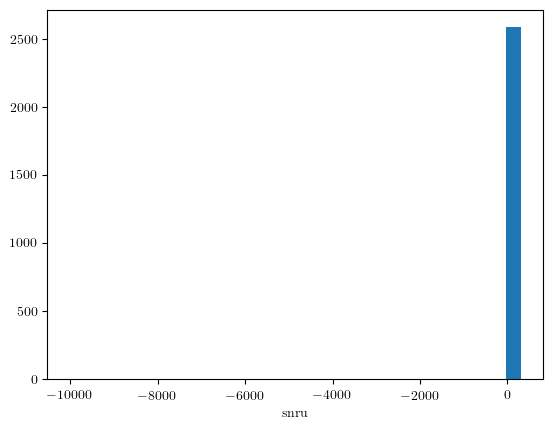

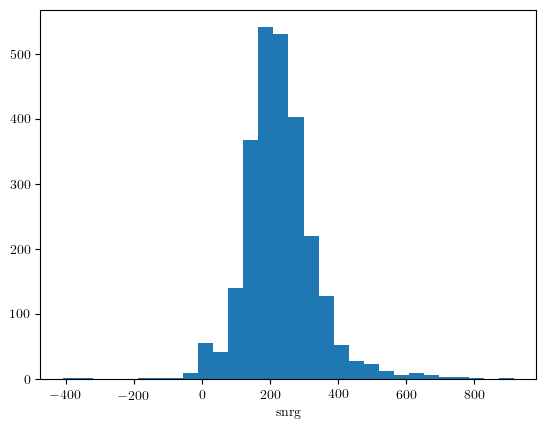

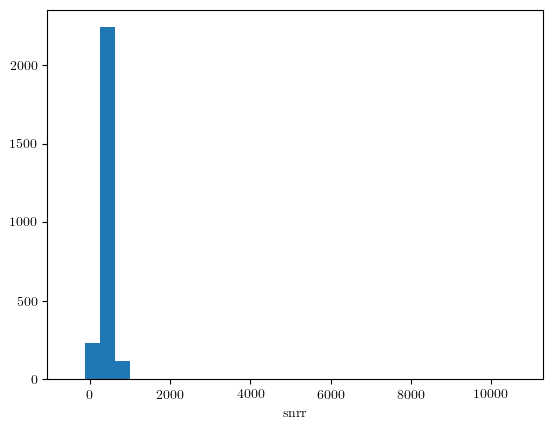

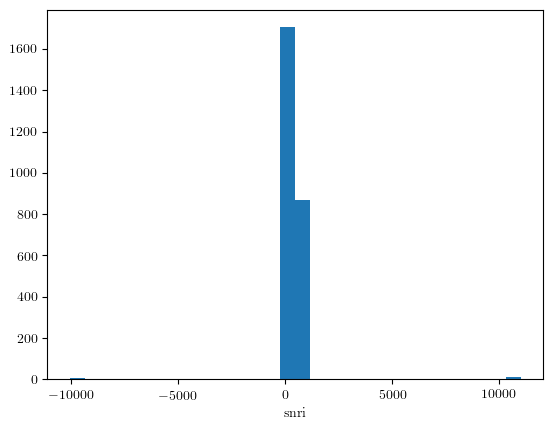

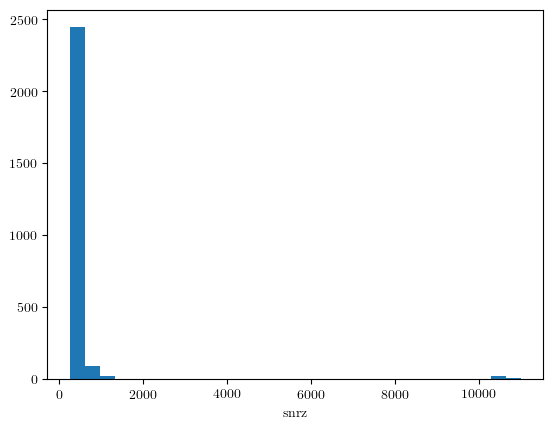

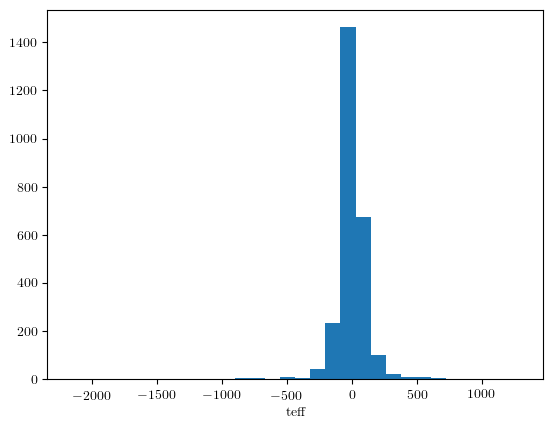

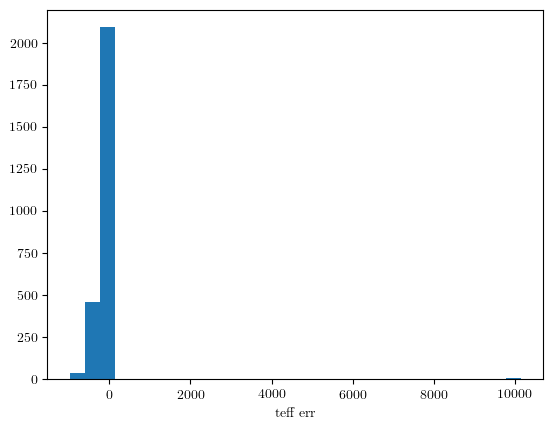

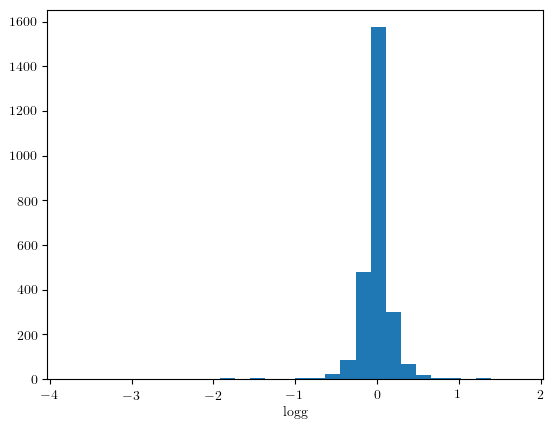

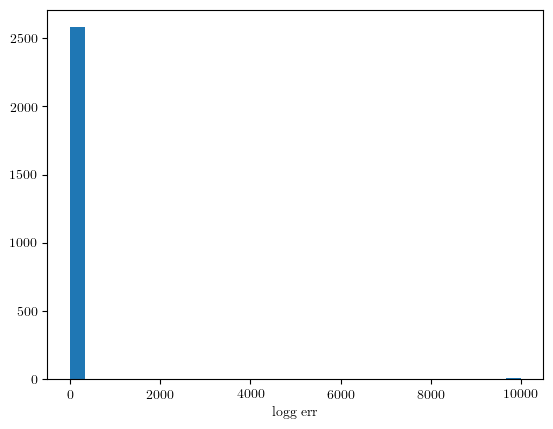

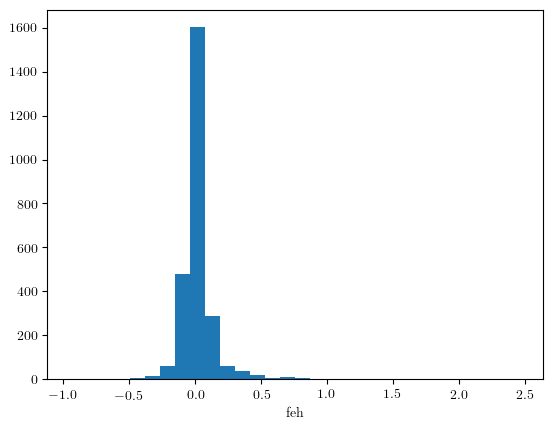

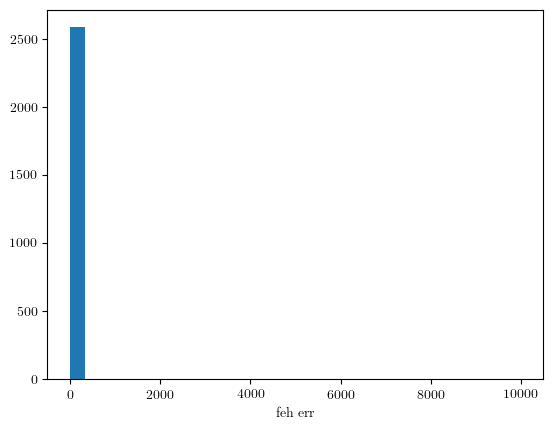

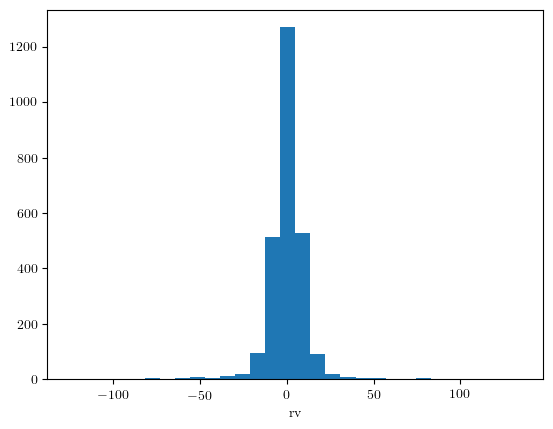

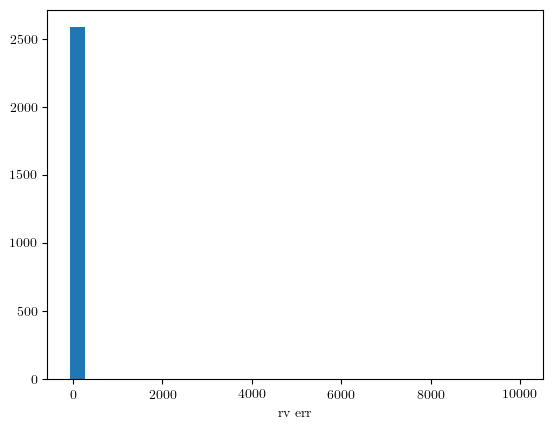

In [75]:
for (name, col) in zip(cols, eachcol(sdiffs))
    figure()
    plt.hist(col[.! isnan.(col)], bins=30)
    xlabel(replace(String(name), "_"=>" "))
end

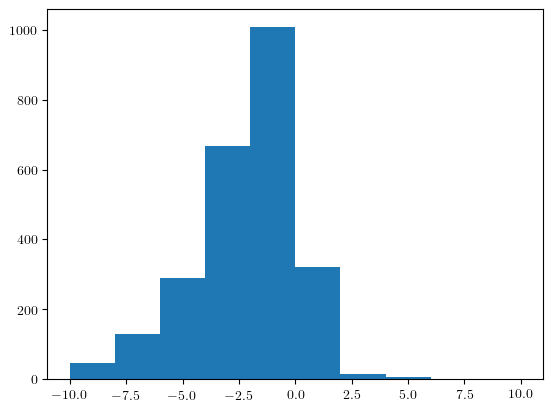

([46.0, 128.0, 290.0, 669.0, 1009.0, 322.0, 14.0, 5.0, 1.0, 0.0], Float32[-10.0, -8.0, -6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x190d3dbe0>, PyObject <matplotlib.patches.Rectangle object at 0x13a0890b8>, PyObject <matplotlib.patches.Rectangle object at 0x190d3deb8>, PyObject <matplotlib.patches.Rectangle object at 0x190d49518>, PyObject <matplotlib.patches.Rectangle object at 0x190d49860>, PyObject <matplotlib.patches.Rectangle object at 0x190d49ba8>, PyObject <matplotlib.patches.Rectangle object at 0x190d49ef0>, PyObject <matplotlib.patches.Rectangle object at 0x190d49f60>, PyObject <matplotlib.patches.Rectangle object at 0x190d595f8>, PyObject <matplotlib.patches.Rectangle object at 0x190d59908>])

In [76]:
plt.hist(sdiffs[:, end], range=[-10, 10])

# compare spectra

In [43]:
include("get_lamost_spectra.jl")

calculate_continuum (generic function with 1 method)

In [44]:
download_lamost_spectra([groups[1].obsid[1]])
wl, flux, ivar = load_lamost_spectrum(groups[1].obsid[1])
spectral_diff = zeros(size(flux))
for group in collect(groups)
    imax = argmax(group.snrz)
    imin = argmin(group.snrz)
    if (group.snrz[imax] > 300) & (group.snrz[imin] < 50)
        try
            download_lamost_spectra(group.obsid[[imax, imin]])
            _, hisnr_flux, = load_lamost_spectrum(group.obsid[imax])
            _, losnr_flux, = load_lamost_spectrum(group.obsid[imin])
            spectral_diff .+= hisnr_flux .- losnr_flux
        catch e
            println(e)
            continue
        end
    end
end
;

of 1 spectra, 0 need to be downloaded
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey

Excessive output truncated after 524289 bytes.


ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!
ey!

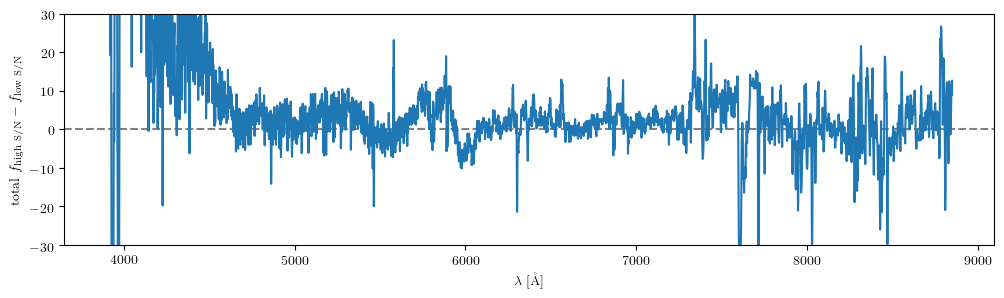

In [58]:
figure(figsize=(12, 3))
plot(wl, spectral_diff)
ylim(-30, 30)
axhline(0, ls="--", c="grey", zorder=-1)
ylabel(L"total $f_\mathrm{high~S/N} - f_\mathrm{low~S/N}$")
xlabel(L"$\lambda$ [\AA]")
savefig("../../Desktop/zoomedin.png")